## 1. Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd

import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.data import load
from collections import Counter


import string
import re

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Importing Dataset (.csv)

df_fake = pd.read_csv("./Dataset/Fake.csv")
df_true = pd.read_csv("./Dataset/True.csv")

# Creating labels for each category of fake news

df_fake["label"] = "1"
df_true["label"] = "0"


df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [3]:
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


### Combining both datasets into one 

In [4]:
df = pd.concat([df_fake, df_true])
df.shape

# Remove irrelevant columns
df.drop(['title', 'subject', 'date'], axis=1, inplace=True)


# Removing rows with empty text

df['text'].dropna(inplace = True)

df.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [5]:

'''

Merged dataset with counts of labelled news where:
1 = fake news 
0 = true news

Total n of elemetents = 44,898

'''

df.label.value_counts(dropna = False)

1    23481
0    21417
Name: label, dtype: int64

In [6]:

# Shuffle dataframe
from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop=True)

df.head(10)


,text,label
0,President Trump on Saturday criticized Hillary...,1
1,"Wow, it s like a president can t even get a ...",1
2,"In case you missed it, CNN anchor Don Lemon we...",1
3,Roughly 70% of states use some form of electro...,1
4,Dr. Harold Bornstein has been practicing medic...,1
5,ANKARA (Reuters) - The head of Turkey s nation...,0
6,In case you ve been living under a rock for yo...,1
7,When thinking about who you d likely want as t...,1
8,A Drexel University professor who said he wa...,1
9,"MANCHESTER, England (Reuters) - British Prime ...",0


## 2. Dataset Preprocessing

In [7]:

'''

Preprocessing steps include: 
1. Lowercase conversion
2. Removing punctuation
3. Removing stopwords
4. Tokenization
5. Lemmatizing word tokens

'''

stopwords = set(nltk.corpus.stopwords.words('english'))
lemm = WordNetLemmatizer()

def process_text (text):
    # Removing Punctuationm
    process_text = "".join ([char for char in text if char not in string.punctuation])
    # Tokenizing Text and converting to lowercase
    process_text = re.split('\W+', text.lower())
    # Removing stopwords
    process_text = [word for word in process_text if word not in stopwords]
    # Lemmatization
    process_text = " ".join ([lemm.lemmatize(i,'v') for i in process_text])
    return process_text


In [8]:
df['cleaned'] = df['text'].apply(lambda x: process_text(x))

column_names = ["text", "cleaned", "label"]
df = df.reindex(columns=column_names)

df.head()

,text,cleaned,label
0,President Trump on Saturday criticized Hillary...,president trump saturday criticize hillary cli...,1
1,"Wow, it s like a president can t even get a ...",wow like president even get boycott go anymore...,1
2,"In case you missed it, CNN anchor Don Lemon we...",case miss cnn anchor lemon go drink alcohol fu...,1
3,Roughly 70% of states use some form of electro...,roughly 70 state use form electronic vote mach...,1
4,Dr. Harold Bornstein has been practicing medic...,dr harold bornstein practice medicine decades ...,1


### Meeting Notes 9/9/2020
* split dataset 70/30 and randomise 
* find possibility to merge classifiers 
* then compare it with another dataset 

9/9/2020

## 3. Split Test/Train data

In [9]:
# The dataset shall be then split into train/test data using sklearn 
# Manipulated variable = 'cleaned' column
# Responsiding variable = 'label' ccolumn

from sklearn.model_selection import train_test_split

x = df.cleaned 
y = df.label

xTrain,xTest,yTrain,yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(35918,) (8980,) (35918,) (8980,)


## 4. Feature Generation


### 4.1 TF_IDF

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vect = CountVectorizer()
xTrainCounts = vect.fit_transform(xTrain)

In [11]:
tfidf_transformer = TfidfTransformer()
xTrainTFIDF = tfidf_transformer.fit_transform(xTrainCounts)
xTrainTFIDF.shape

(35918, 99941)

### 4.2 POS Tags

* Example of tags are listed below: (From the NLTK Universal tagset)



| Tag | Meaning | English Examples |
| ------------- |:----------------:|:----------------:|
| ADJ | adjective | new, good, high, special, big, local |
| ADP | adposition  | on, of, at, with, by, into, under |
| ADV  | adverb | really, already, still, early, now |
| CONJ  | conjunction |  and, or, but, if, while, although  |
|  DET | determiner, article  | the, a, some, most, every, no, which  |
| NOUN | noun | noun year, home, costs, time, Africa   |
| NUM |numeral | twenty-four, fourth, 1991, 14:24  |
| PRT  |particle  |  at, on, out, over per, that, up, with   |
| PRON | pronoun |   he, their, her, its, my, I, us  |
| VERB | verb |  is, say, told, given, playing, would  |
| "." | punctuation | " . , ; !"  |
|X | other  | ersatz, esprit, dunno, gr8, univeristy  |


In [12]:
def pos_tag(text):
    postag = nltk.pos_tag(word_tokenize(text),tagset = 'universal')
    pos_list = list()
    for word in postag:
        pos_list.append(word[0] + "/" + word[1])
    
    final = ' '.join(pos_list)
    return final


In [13]:
xTrainPOS = xTrain.apply(pos_tag)
xTestPOS = xTest.apply(pos_tag)

In [14]:
print(xTrainPOS.head())

36335    rimini/NOUN italy/NOUN reuters/NOUN italy/VERB...
12384    shanghai/NOUN reuters/NOUN central/ADJ local/A...
24419    june/NOUN 15/NUM 2016/NUM president/NOUN trump...
24740    truth/NOUN hurt/VERB idea/NOUN people/NOUN ame...
27039                                    yep/NOUN like/ADP
Name: cleaned, dtype: object


### POS CountVec

In [15]:
vect = CountVectorizer()
xTrainPOS_Count = vect.fit_transform(xTrainPOS)
xTestPOS_Count = vect.transform(xTestPOS)

In [16]:
tfidf_transformer = TfidfTransformer()
xTrainPOS_Tfidf = tfidf_transformer.fit_transform(xTrainPOS_Count)
xTestPOS_Tfidf = tfidf_transformer.transform(xTestPOS_Count)
xTrainPOS_Tfidf.shape

(35918, 99944)

In [17]:
xTestPOS_Tfidf.shape

(8980, 99944)

### 4.3 N-Grams

Fitting on the training set and transforming on the training and test set assures that:
 - given a word, the word is correctly always mapped on the same column, both in the training and test set. 

In [18]:
vect = CountVectorizer(ngram_range=(2,3))
xTrainNgram = vect.fit_transform(xTrain)
#xTestNgram = vect.transform(xTest)
vect.get_feature_names()

['00 00',
 '00 00 pm',
 '00 000',
 '00 000 people',
 '00 0500',
 '00 0500 gmt',
 '00 0700',
 '00 0700 gmt',
 '00 09',
 '00 09 occupiers',
 '00 09 subject',
 '00 11',
 '00 11 march',
 '00 12',
 '00 12 compatriot',
 '00 1200',
 '00 1200 gmt',
 '00 1600',
 '00 1600 gmt',
 '00 1800',
 '00 1800 gmt',
 '00 1931',
 '00 1931 est',
 '00 201',
 '00 201 000',
 '00 22',
 '00 22 ampresident',
 '00 40',
 '00 40 gmt',
 '00 accord',
 '00 accord police',
 '00 add',
 '00 add trump',
 '00 address',
 '00 address real',
 '00 afternoon',
 '00 afternoon saturday',
 '00 also',
 '00 also schedule',
 '00 american',
 '00 american consumers',
 '00 announcement',
 '00 announcement vp',
 '00 bedminster',
 '00 bedminster 0711',
 '00 bill',
 '00 bill clinton',
 '00 california',
 '00 california congresswoman',
 '00 campaign',
 '00 campaign headquarter',
 '00 central',
 '00 central specific',
 '00 central time',
 '00 civilians',
 '00 civilians besiege',
 '00 cnn',
 '00 cnn stelter',
 '00 comment',
 '00 comment public',

## 5. Modelling



### 5.1 Evaluation Metrics 

Several evaluation metrices shall be used:
1. Model Score (Accuracy)
1. Precision Score
1. F1- Score 
1. Recall Score

In [19]:
## Function to plot confusion matrix using matplot
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics 

## 5.2 Logistic Regression Modelling

### 1.TFIDF

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression


LRPipeline = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('clf', LogisticRegression())])

model = LRPipeline.fit(xTrain, yTrain)
yPredict = model.predict(xTest)


cm = confusion_matrix (yTest, yPredict)
print("Accuracy: {}%".format(round(metrics.accuracy_score(yTest, yPredict)*100,2)))
print ("Confusion Matrix \n", cm)
print(classification_report(yTest, yPredict))

Accuracy: 98.82%
Confusion Matrix 
 [[4214   59]
 [  47 4660]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4273
           1       0.99      0.99      0.99      4707

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Confusion matrix, without normalization


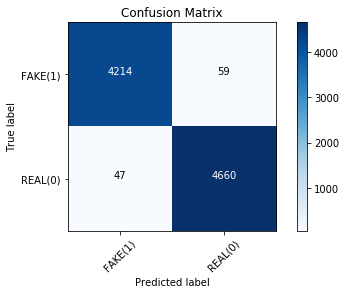

In [22]:
import itertools
plot_confusion_matrix(cm,classes=['FAKE(1)','REAL(0)'])

### 2. N-gram

In [23]:
model = LogisticRegression()
LRModel = model.fit(xTrainNgram, yTrain)

yPredict = LRModel.predict(vect.transform(xTest))

cm = confusion_matrix (yTest, yPredict)
print("Accuracy: {}%".format(round(metrics.accuracy_score(yTest, yPredict)*100,2)))
print ("Confusion Matrix \n", cm)
print(classification_report(yTest, yPredict))

Accuracy: 98.03%
Confusion Matrix 
 [[4146  127]
 [  50 4657]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4273
           1       0.97      0.99      0.98      4707

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



Confusion matrix, without normalization


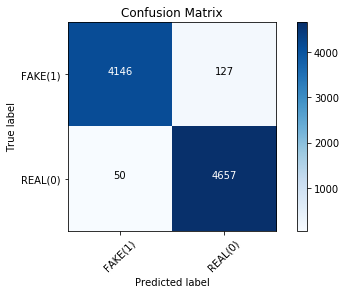

In [24]:
plot_confusion_matrix(cm,classes=['FAKE(1)','REAL(0)'])

In [25]:
#LRPipeline = Pipeline([('vect', CountVectorizer(ngram_range=(2,3) )),
#                 ('tfidf', TfidfTransformer()),
#                ('clf', LogisticRegression())])

#model = LRPipeline.fit(xTrain, yTrain)

#yPredict = LRModel.predict(vect.transform(xTest))

#cm = confusion_matrix (yTest, yPredict)
#print("Accuracy: {}%".format(round(metrics.accuracy_score(yTest, yPredict)*100,2)))
#print ("Confusion Matrix \n", cm)
#print(classification_report(yTest, yPredict))

In [26]:
#plot_confusion_matrix(cm,classes=['FAKE(1)','REAL(0)'])

### 3. POS Tag

In [27]:
LRPipeline = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('clf', LogisticRegression())])

model = LRPipeline.fit(xTrainPOS,yTrain)
yPredict = model.predict(xTest)

cm = confusion_matrix (yTest, yPredict)
print("Accuracy: {}%".format(round(metrics.accuracy_score(yTest, yPredict)*100,2)))
print ("Confusion Matrix \n", cm)
print(classification_report(yTest, yPredict))

Accuracy: 92.35%
Confusion Matrix 
 [[3594  679]
 [   8 4699]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      4273
           1       0.87      1.00      0.93      4707

    accuracy                           0.92      8980
   macro avg       0.94      0.92      0.92      8980
weighted avg       0.93      0.92      0.92      8980



Confusion matrix, without normalization


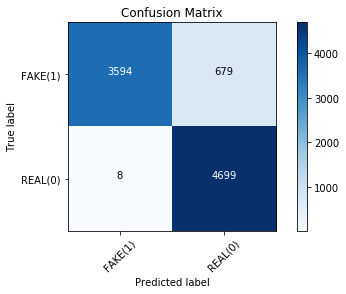

In [28]:
plot_confusion_matrix(cm,classes=['FAKE(1)','REAL(0)'])

In [29]:
model = LogisticRegression()
LRModel = model.fit(xTrainPOS_Tfidf, yTrain)

yPredict = LRModel.predict(xTestPOS_Tfidf)

cm = confusion_matrix (yTest, yPredict)
print("Accuracy: {}%".format(round(metrics.accuracy_score(yTest, yPredict)*100,2)))
print ("Confusion Matrix \n", cm)
print(classification_report(yTest, yPredict))

Accuracy: 98.1%
Confusion Matrix 
 [[4199   74]
 [  97 4610]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4273
           1       0.98      0.98      0.98      4707

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



Confusion matrix, without normalization


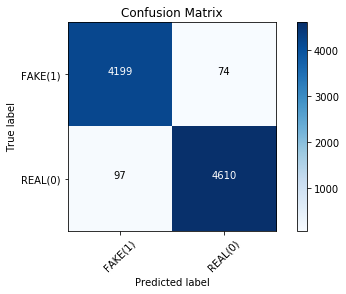

In [30]:
plot_confusion_matrix(cm,classes=['FAKE(1)','REAL(0)'])

## 5.3 SVM Modelling 

### 1.TFIDF

In [ ]:
from sklearn.svm import SVC, LinearSVC

SVCPipeline = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('clf', SVC())])

model = SVCPipeline.fit(xTrain, yTrain)
yPredict = model.predict(xTest)

cm = confusion_matrix (yTest, yPredict)
print("Accuracy: {}%".format(round(metrics.accuracy_score(yTest, yPredict)*100,2)))
print ("Confusion Matrix \n", cm)
print(classification_report(yTest, yPredict))

In [ ]:
plot_confusion_matrix(cm,classes=['FAKE(1)','REAL(0)'])

### 2. N-gram 

In [ ]:
model = SVC()
LRModel = model.fit(xTrainNgram, yTrain)

yPredict = LRModel.predict(vect.transform(xTest))

cm = confusion_matrix (yTest, yPredict)
print("Accuracy: {}%".format(round(metrics.accuracy_score(yTest, yPredict)*100,2)))
print ("Confusion Matrix \n", cm)
print(classification_report(yTest, yPredict) )

In [ ]:
plot_confusion_matrix(cm,classes=['FAKE(1)','REAL(0)'])

### 3.  POS Tag

In [ ]:
model = SVC()
LRModel = model.fit(xTrainPOS_Tfidf, yTrain)

yPredict = LRModel.predict(xTestPOS_Tfidf)

cm = confusion_matrix (yTest, yPredict)
print("Accuracy: {}%".format(round(metrics.accuracy_score(yTest, yPredict)*100,2)))
print ("Confusion Matrix \n", cm)
print(classification_report(yTest, yPredict))

In [ ]:
plot_confusion_matrix(cm,classes=['FAKE(1)','REAL(0)'])

## 5.4 Multinomial Naive Bayes

### 1.TFIDF

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NBPipeline = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('clf', MultinomialNB())])

model = NBPipeline.fit(xTrain, yTrain)
yPredict = model.predict(xTest)

cm = confusion_matrix (yTest, yPredict)
print("Accuracy: {}%".format(round(metrics.accuracy_score(yTest, yPredict)*100,2)))
print ("Confusion Matrix \n", cm)
print(classification_report(yTest, yPredict))

In [ ]:
plot_confusion_matrix(cm,classes=['FAKE(1)','REAL(0)'])

### 2. N-gram 

In [ ]:
model = MultinomialNB()
LRModel = model.fit(xTrainNgram, yTrain)

yPredict = LRModel.predict(vect.transform(xTest))

cm = confusion_matrix (yTest, yPredict)
print("Accuracy: {}%".format(round(metrics.accuracy_score(yTest, yPredict)*100,2)))
print ("Confusion Matrix \n", cm)
print(classification_report(yTest, yPredict))

In [ ]:
plot_confusion_matrix(cm,classes=['FAKE(1)','REAL(0)'])

### 3. POS Tags

In [ ]:
model = MultinomialNB()
LRModel = model.fit(xTrainPOS_Tfidf, yTrain)

yPredict = LRModel.predict(xTestPOS_Tfidf)

cm = confusion_matrix (yTest, yPredict)
print("Accuracy: {}%".format(round(metrics.accuracy_score(yTest, yPredict)*100,2)))
print ("Confusion Matrix \n", cm)
print(classification_report(yTest, yPredict))

In [ ]:
plot_confusion_matrix(cm,classes=['FAKE(1)','REAL(0)'])

# 6. Model Validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

folds = KFold(n_splits= 5)

In [ ]:
def cv_score(model,x,y,):
    score = cross_val_score(model(),x,y, cv = folds) # cv (kfolds) = 5
    #print(f'Mean of cross validation score after 5 folds: %0.2f {score.mean(), score.std()}')
    print ('Acuracy %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() *2))

In [ ]:
print ("Logistic Regression cross_val_score:")
print ("TFIDF" ) 
cv_score(LogisticRegression,xTrainTFIDF,yTrain,)
print ("NGRAM" ) 
cv_score(LogisticRegression,xTrainNgram,yTrain)
print ("POS Tag" ) 
cv_score(LogisticRegression,xTrainPOS_Tfidf,yTrain)

In [ ]:
print ("SVM cross_val_score:")
print ("TFIDF" )
cv_score(LinearSVC,xTrainTFIDF,yTrain)
print ("NGRAM" )
cv_score(LinearSVC,xTrainNgram,yTrain,)
print ("POS Tag")
cv_score(LinearSVC,xTrainPOS_Tfidf,yTrain)

In [ ]:
print ("MNB cross_val_score:")
print ("TFIDF" ) 
cv_score(MultinomialNB,xTrainTFIDF,yTrain)
print ("NGRAM" )
cv_score(MultinomialNB,xTrainNgram,yTrain,)
print ("POS Tag")
cv_score(MultinomialNB,xTrainPOS_Tfidf,yTrain)